In [40]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display


# Experiment Objective


## Describe the data set that is being analyzed. Including the TOS (Terms of Service) and ethical considerations
- Lecture 07 Data Science Ethics, and Building Good Training Datasets with Data Preprocessing

The Data set that is being examined is from the University of Calironia - Irvine's Machine Learning repository. I looked at a few other datasets from the U.S. Census, SNOTEL, and various Employement Statistics. This data set seemed the most revelant to my current job. It is a little lighter on the extractaion method which should led me more time to focuse on machine learning aspects of the project. 

When looking at the "READ ME" of this data set it is cited that the data set is available for research, but should include the following citation.

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt
"


- What am I attempting to model?

With the dataset that I have selected, I am attempting to predict if a client has subscribed to a term deposit. More importantly, if a campaign was successfull in helpful in determing that the client dubscribed.

- Why did I choose the traininng examples I did for training the model

There were a few things in the data set that needed to be remove before more extensive feature selection could be conducted. The first point is selecting clients that have not been contacted before for a campaign. This means we have to scrub out any data points that do not have pday = -1 or previous > 0. Because we do not which campaigns the clients were a part of previously contacted people offer an opportunity to sckew the data. There could be some clients that were contacted by a certain campaign while other were not contacted by the same one. By removing these clients we remove this potential source of bias

## Experiment Objective: 
- Did a client subscribe a term deposit.
- What are the significant factors in determining if a client is subscribed to a term deposit



# Data Collection


### Write the Necessary Python code to retrieve and store the training examples that are to be used in the model
- Am I accessing an API / Scraping a website? Downloading an archive?

The Data is being downloaded directly from an archive

- Implementation goes in this section. 

Code implementation is below

- Result of this section should be an in-memory panda DF

The Dataframe is shown a few times. At first the raw head of the data frame is displayed. Then a few statistics are shown. After that feature selection is conducted and reduced down until there is a sutaible dataset to build the model upon.

- Note the data must have at least five different features , and at least two unique class labels

There are 16 different features to start with this gets boiled down as the project goes on. Which will be listed below in the code. The Classification label is either "Yes" or "No". Leaving use with two unique classification labels. 


In [41]:
# Grabbing the website
!wget 'banking_data' 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'

--2022-07-24 04:06:27--  http://banking_data/
Resolving banking_data (banking_data)... failed: Name or service not known.
wget: unable to resolve host address ‘banking_data’
--2022-07-24 04:06:27--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.2’

bank.zip.2          100%[===================>] 565.47K  --.-KB/s    in 0.1s    

2022-07-24 04:06:27 (4.09 MB/s) - ‘bank.zip.2’ saved [579043/579043]

FINISHED --2022-07-24 04:06:27--
Total wall clock time: 0.3s
Downloaded: 1 files, 565K in 0.1s (4.09 MB/s)


In [42]:
!unzip -o 'bank.zip'

Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                


In [43]:
# Downloading the Excel file and reading in the second sheet
df = pd.read_csv('bank-full.csv', sep=';')

In [44]:
# Filtering out clients that have been contacted by previous campaigns
df = df.loc[(df['pdays'] == -1) & (df['previous'] == 0)]

# Dropping out these two columns because they are no longer needed
df = df.drop(labels=['pdays','previous'], axis=1)

In [45]:
# Displaying the Head of the Data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,unknown,no


In [46]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [47]:
df.shape

(36954, 15)

Before we get started looking into the different types of stats of the 

In [48]:
# Giving the descriptive metrics
display(df.describe())

# Displaying Info $ and DTypes and counts
display(df.info())

,age,balance,day,duration,campaign
count,36954.000000,36954.000000,36954.000000,36954.000000,36954.000000
mean,40.932430,1318.788846,16.145424,257.726119,2.921957
std,10.430218,3039.557077,8.372554,262.256406,3.325791
min,18.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,55.000000,9.000000,101.000000,1.000000
50%,39.000000,414.000000,17.000000,177.000000,2.000000
75%,49.000000,1358.000000,22.000000,318.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 36954 entries, 0 to 45209
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36954 non-null  int64 
 1   job        36954 non-null  object
 2   marital    36954 non-null  object
 3   education  36954 non-null  object
 4   default    36954 non-null  object
 5   balance    36954 non-null  int64 
 6   housing    36954 non-null  object
 7   loan       36954 non-null  object
 8   contact    36954 non-null  object
 9   day        36954 non-null  int64 
 10  month      36954 non-null  object
 11  duration   36954 non-null  int64 
 12  campaign   36954 non-null  int64 
 13  poutcome   36954 non-null  object
 14  y          36954 non-null  object
dtypes: int64(5), object(10)
memory usage: 4.5+ MB


None

While on the face, It looks like there are no missing values. This is not quite true. They have been entries marked as unknown. For this reason we will change them to make them more visable and easier to handle.

In [49]:
# Replacing all the Unknown values with Nan
df.replace('unknown', np.nan, inplace=True)

# Displaying the count of the NaN's in the dataframe
df.isna().sum()

age              0
job            255
marital          0
education     1534
default          0
balance          0
housing          0
loan             0
contact      12950
day              0
month            0
duration         0
campaign         0
poutcome     36954
y                0
dtype: int64

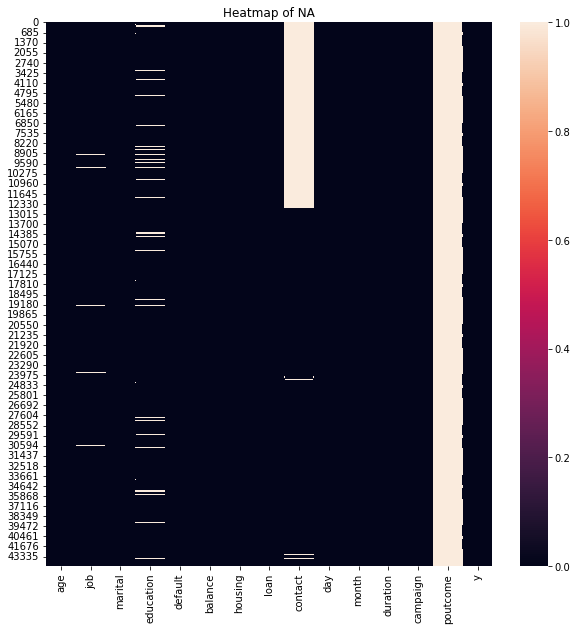

In [50]:
# Displaying the new NaNs on a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())
plt.title('Heatmap of NA')
plt.show()

In [51]:
missing_col_per = pd.DataFrame([(df[col].isnull().sum()/df.shape[0]) for col in df.columns] , df.columns, columns=['Percent_Missing'])
missing_col_per

,Percent_Missing
age,0.000000
job,0.006900
marital,0.000000
education,0.041511
default,0.000000
balance,0.000000
housing,0.000000
loan,0.000000
contact,0.350436
day,0.000000


Since we removed all the clients that had been placed in a campaign before we now get 100% of the Poutcome column as unknown. Meaning that this column should be dropped. Below we set up the threshold for dropping a column as over 80% missing. This will end up taking contact and poutcome out of the equation.

In [56]:
# Setting the limit for dropping
drop_lim = df.shape[0] * .8
df_1 = df.dropna(thresh=drop_lim, axis=1)

In [55]:
# Displaying the New Columns to be used
df_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [57]:
# Displaying the count of the NaN's in the dataframe
df_1.isna().sum()

age             0
job           255
marital         0
education    1534
default         0
balance         0
housing         0
loan            0
day             0
month           0
duration        0
campaign        0
y               0
dtype: int64

In [58]:
# Showing the number of unique values
df_1.nunique()

age            76
job            11
marital         3
education       3
default         2
balance      7058
housing         2
loan            2
day            31
month          12
duration     1525
campaign       48
y               2
dtype: int64

There are a few NaN's still present in the data set bu t they dont leave enough of a mark on the data to warrent removing the entire column. Instead this will be left to the data pipeline for removal. Before going completely ahead. Some brief data visualization is needed to get a full understanding of the data that we have collected.

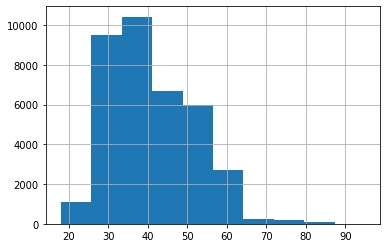

In [60]:
# Age
df_1['age'].hist()

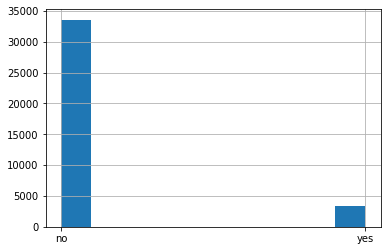

In [61]:
# Y variable
df_1['y'].hist()

The distribution of the Yes to the No in the Y variable is a bit concerning for our test. We will have to resample the no and maybe do some cross validation to bring this more to an even set.

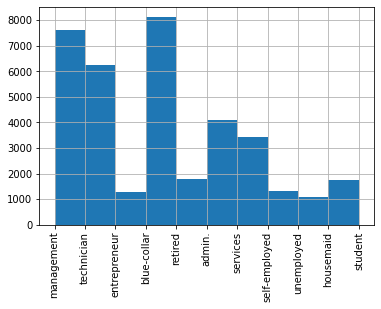

In [71]:
# Job
df_1['job'].hist()
plt.xticks(rotation=90)
plt.show()

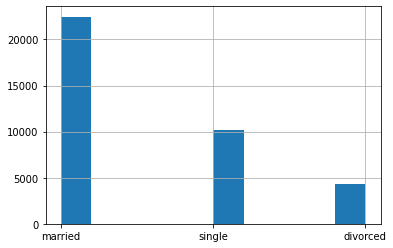

In [73]:
# Marital status
df_1['marital'].hist()
plt.show()

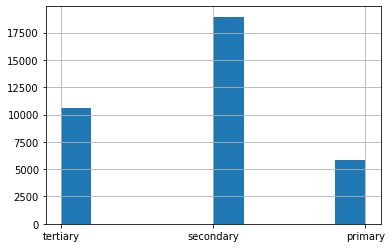

In [75]:
# Education
df_1['education'].hist()
plt.show()

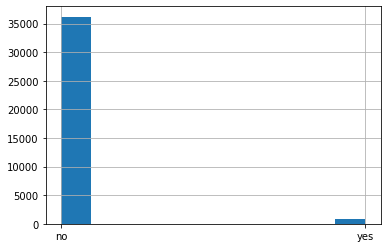

In [76]:
# Default
df_1['default'].hist()
plt.show()

In [ ]:
# Balance
df_1['balance'].hist()
plt.show()

In [ ]:
# Housing
df_1['housing'].hist()
plt.show()

In [ ]:
# Loan
df_1['loan'].hist()

In [ ]:
# Day
df_1['day'].hist()

In [ ]:
# Month
df_1

In [ ]:
# Duration

In [ ]:
# Campaign

# Data Preprocessing
## This is where I perform functions such as iumputing / dropping missing data,scaling features, mapping categorical labels, feature selection / extraction to select relevant features and reduce the dimensionality of the training examples. 
- The Extraction methods chosen for preprocessing data will depend on the ML algorithms intended to use, the state of the training examples collected
-A requirement of the project will be to address each category of data preprocessing stated above, describe the reasons for whether you used a given preprocessing technique or not
- At least Three of the features must require some form of data preprocessing
- Data cannot be "Turn-Key" for training

The Data is rather clean, but not completely turn key because we have to transform all of the categorical variables.

- NOTE regardless of wehter the features can ultimately be reduced via feature selection techniques or not, it's a requirement that you perform feature selection analysis to determine the relative importance of each feature and decide which features should be included in the model


- After preprocessing the data, check examples to ensure your training dataset is balanced
- Remove examples with missing fields, or instances, could reulst in a training dataset that is unbalanced if one class label was more likely to be missing a particular feature.
-If you find yourself in the situation of having inbalanced dataset after preprocessing your data, consider alternative methods of preprocessing such as creating fake values or dropping the feature altogehr. These kinds of decisions are precisely what I want described in the write up inside the note book.

In [32]:
# Data Preprocessing Code
df_1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

To look into running the different algorithms we need to set up a data pipeline. To do this I will use some of the libraries from sklearn

In [33]:
# Import Strings
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [36]:
# Counting to see the sums
df_1.isnull().any().sum()

2

# Model Comparison

## This is where I will implement and compare the performance of at least three different classification algorithms to determine which model best fits the training and test data collected. 
- A description of the performance of each model (using an evaluation criteria such as classification accurcy) is required for this section as well as an overall decision as to which model is the best choiuce for the problem domain
-NOTE: the preceptron is not allowed to be one of the models you compare for this projec, as there are better algorithms available to you with similar functionality

In [18]:
# Model Comparison Code


# Experiment Summary


## This is where the results are sumarized for the experiment. 
- How did I have to collect data? How 2was the data preprocessed?
- What models where compared?
- Which Model performed the best
- Was I able to model the data accurately in the way I was hoping when I started the project?
- What did I learn during the process

In [19]:
# Experiment Summary Code